### MATH2504 S2, 2023, BigHW Submission 
### Submission form II of IV 

Student #1 name: Matthew Lynch

Student #1 ID: 47426557

Student #2 name: Felicity Caruana

Student #2 ID: 47425523

GitHub repo: https://github.com/lynchmatt/Matthew-Lynch_Felicity-Caruana-2504-2023-BigHW

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

In [ ]:
# PACKAGES NEEDED
import Pkg; Pkg.add("StatsBase")
import Pkg; Pkg.add("Primes")
import Pkg; Pkg.add("Plots")

# Solution to [Question 5](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q5)

## 5a:

In [ ]:
### This code finds all the abundant numbers from 1 to 200, using divisors() from Primes.jl

using Primes

function abundant_finder_1()
    for i in 1:200
        div = divisors(i)
        total = sum(div) - i
        if total > i
            println("Abundant number found: ", i)
        else
            continue
        end
    end
end

abundant_finder_1()

## 5b:

In [22]:
### This code makes a function to find divisors of a number, then implements it to find the abundant numbers 
### up to 200.
using Primes

function my_divisor_finder(n)
    divlist = [i for i in 1:200 if n % i ==0]
    return divlist
end

# Now make another abundant number-finder, using the new divisor function my_divisor_finder

function abundant_finder_2()
    for i in 1:200
        divlist = my_divisor_finder(i)
        total = sum(divlist) - i
        if total > i
            println("Abundant number found: ", i)
        else
            continue
        end
    end
end

abundant_finder_2()


Abundant number found: 12
Abundant number found: 18
Abundant number found: 20
Abundant number found: 24
Abundant number found: 30
Abundant number found: 36
Abundant number found: 40
Abundant number found: 42
Abundant number found: 48
Abundant number found: 54
Abundant number found: 56
Abundant number found: 60
Abundant number found: 66
Abundant number found: 70
Abundant number found: 72
Abundant number found: 78
Abundant number found: 80
Abundant number found: 84
Abundant number found: 88
Abundant number found: 90
Abundant number found: 96
Abundant number found: 100
Abundant number found: 102
Abundant number found: 104
Abundant number found: 108
Abundant number found: 112
Abundant number found: 114
Abundant number found: 120
Abundant number found: 126
Abundant number found: 132
Abundant number found: 138
Abundant number found: 140
Abundant number found: 144
Abundant number found: 150
Abundant number found: 156
Abundant number found: 160
Abundant number found: 162
Abundant number found:

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 6](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q6)

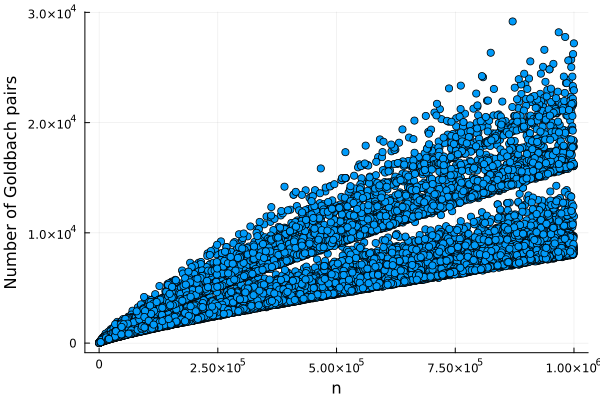

In [2]:
"""
Returns the all the primes up to n.
"""

function sieve_of_Eratosthenes(n)
    primebits = ones(Bool,n) #Will contain true if the index is prime (initially all assumed prime)
    primebits[1] = false #The number 1 is not prime
    p = 2 #Smallest prime
    while p ≤ n
        i = 2p
        while i ≤ n  # \le +[TAB]
            primebits[i] = false
            i += p
        end
        p += 1
        while p ≤ n && !primebits[p]
            p += 1
        end
    end
    (1:n)[primebits]
end


using Plots
using StatsBase: sample

function check_Goldbach(n)
    @assert iseven(n)
    num_pairs = 0
    
    #turn the sieve into a set so order doesn't matter and Julia can sift through faster
    sieve = Set(sieve_of_Eratosthenes(n)) # only call the function once
    for p in sieve
        if in(n-p,sieve)
            num_pairs += 1
        end
    end
    return num_pairs
end

n = 10^6
even_range = sample(4:2:n, 19000) #only plot a subset of 19000 points

checks = check_Goldbach.(even_range)

if 0 ∈ checks
    println("Found a counter example for Goldbach")
end


scatter(even_range,checks,legend=false,xlabel="n",ylabel="Number of Goldbach pairs")

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 7](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q7)

## 7a:

In [1]:
### Answer 7a here (in place of this comment)
# install packages (REMEMBER TO UNCOMMENT)
# import Pkg; Pkg.add("Measures")
# import Pkg; Pkg.add("Plots")
# import Pkg; Pkg.add("LaTeXStrings")
using Plots, LaTeXStrings, Measures

# define sequences
fn1(n) = 1 - 1/√(20n)
fn2(n) = 1 - exp(-(n-1)/50)
fn3(n) = max(min(1, n/600 + 0.2),0)
fn4(n) = 1/(1+exp(-(n - 100)/200))


# define domain and range
xVals, yVals = 0:1:600, 0:10

# plot sequences REMEMBER TO UNCOMMENT
# plot(xVals, [fn1.(xVals), fn2.(xVals), fn3.(xVals), fn4.(xVals)], 
#    label=["Function 1" "Function 2" "Function 3" "Function 4"], 
#    seriestype=:scatter, m=(:dot, 2), markerstrokewidth=0, ma=0.5,
#    title="Functions")

(0:1:600, 0:10)

## 7b:

In [62]:
## This code makes a function that finds the smallest n where f(n) is greater than a target number.

function find_n_basic(f::Function, target::Number)
    n = 0
    while f(n) < target
        n = n + 1
    end
    println("Smallest n where $f is greater than $target is $n.")
end

# create lists for easy iteration of each function over different example target values
functions = [fn1, fn2, fn3, fn4]
example_values = [0.2, 0.4, 0.6, 0.8]

for f in functions
    for v in example_values
        find_n_basic(f, v)
    end
    println()
end

Smallest n where fn1 is greater than 0.2 is 1.
Smallest n where fn1 is greater than 0.4 is 1.
Smallest n where fn1 is greater than 0.6 is 1.
Smallest n where fn1 is greater than 0.8 is 2.

Smallest n where fn2 is greater than 0.2 is 13.
Smallest n where fn2 is greater than 0.4 is 27.
Smallest n where fn2 is greater than 0.6 is 47.
Smallest n where fn2 is greater than 0.8 is 82.

Smallest n where fn3 is greater than 0.2 is 0.
Smallest n where fn3 is greater than 0.4 is 120.
Smallest n where fn3 is greater than 0.6 is 240.
Smallest n where fn3 is greater than 0.8 is 360.

Smallest n where fn4 is greater than 0.2 is 0.
Smallest n where fn4 is greater than 0.4 is 19.
Smallest n where fn4 is greater than 0.6 is 182.
Smallest n where fn4 is greater than 0.8 is 378.



## 7c:

In [63]:
### Answer 7c here (in place of this comment)
function find_n_geometric(f::Function, target::Number)
    n = 0
    if f(n) >= target
        println("Smallest n where $f is greater than $target is $(n).")
    else
        n = 1
        exponent = 1
        while f(n) < target
            n = 2^(exponent)
            exponent = exponent+1
        end
    while f(n) >= target
        n = n-1
    end
    println("Smallest n where $f is greater than $target is $(n+1).")
    end 
end

for f in functions
    for v in example_values
        find_n_geometric(f, v)
    end
    println()
end

Smallest n where fn1 is greater than 0.2 is 1.
Smallest n where fn1 is greater than 0.4 is 1.
Smallest n where fn1 is greater than 0.6 is 1.
Smallest n where fn1 is greater than 0.8 is 2.

Smallest n where fn2 is greater than 0.2 is 13.
Smallest n where fn2 is greater than 0.4 is 27.
Smallest n where fn2 is greater than 0.6 is 47.
Smallest n where fn2 is greater than 0.8 is 82.

Smallest n where fn3 is greater than 0.2 is 0.
Smallest n where fn3 is greater than 0.4 is 120.
Smallest n where fn3 is greater than 0.6 is 240.
Smallest n where fn3 is greater than 0.8 is 360.

Smallest n where fn4 is greater than 0.2 is 0.
Smallest n where fn4 is greater than 0.4 is 19.
Smallest n where fn4 is greater than 0.6 is 182.
Smallest n where fn4 is greater than 0.8 is 378.



## 7d:

In [ ]:
# iterative binary search
function binary_search(f:: Function, exponent::Number, target::Number)
    low = 2^(exponent)
    high = 2^(exponent+1)
    mid = (low+high)/2
    while (high-low) >= 1
        mid = (low+high)/2
        if target == f(mid)
            println("Smallest n where $f is greater than $target is ", mid)
            return mid
        elseif f(mid) < target
            low = mid
        else
            high = mid
        end
    end
    if f(floor(mid)) > target && f(ceil(mid)) > target
        println("Smallest n where $f is greater than $target is ", floor(mid))
    elseif f(floor(mid)) < target && f(ceil(mid)) > target
        println("Smallest n where $f is greater than $target is ", ceil(mid))
    end
end

# function using binary search
function find_n_fast(f::Function, target::Number)
    n = 0
    if f(n) >= target
        println("Smallestwhere $f is greater than $target is $(n).")
        return target
    else
        n = 1
        if f(n) >= target
            println("Smallest n where $f is greater than $target is $(n).")
            return target
        else
            exponent = 1
            while (f(n) < target) && (f(2^(exponent+1)) < target)
                exponent = exponent+1
                n = 2^exponent
            end
            binary_search(f, exponent, target)
        end
    end
end

for f in functions
    for v in example_values
        find_n_fast(f, v)
    end
    println()
end

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 8](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q8)

## 8a:

In [1]:
function array_table(array, heading)
    println(heading,":")
    for (i,a) in enumerate(array)
        println(i,"\t",a)
    end
end

names = [   "Amy Chan",
            "Maithili Mehta",
            "Anna Foeglein",
            "Andy Ferris",
            "Thomas Graham",
            "Elaine Schenk",
            "Jesse Woods",
            "Tina Moghaddam",
            "Paul Bellette",
            "Paul Vrbik",
            "Tom Cranitch",
            "Yoni Nazarathy",
            "Sam Hambleton",
            "Isaac Beh", 
            "Limao Chang", 
            "Nazeef Hamid", 
            "Cooper Janke", 
            "Brandon Lowe", 
            "Lief Lundmark",
            "Megan Dawson",
            "Alistair Falconer",
            "Emma Comino",
            "Ivana Carrizo-Molina"]

sorted_names = sort(names)
array_table(sorted_names, "Sorted by first name")

println()

sorted_names = sort(names,by=(x)->reverse(split(x," ")))
array_table(sorted_names,"Sorted by last name")

println()

# add code to sort names by lastname length
length_names = sort(names, by=(x)-> length(split(x," ")[2]))
array_table(length_names, "Sorted by lastname length")

#If this error appears : cannot assign a value to imported variable Base.names from module Main 
    #RESTART KERNEL and then run again

Sorted by first name:
1	Alistair Falconer
2	Amy Chan
3	Andy Ferris
4	Anna Foeglein
5	Brandon Lowe
6	Cooper Janke
7	Elaine Schenk
8	Emma Comino
9	Isaac Beh
10	Ivana Carrizo-Molina
11	Jesse Woods
12	Lief Lundmark
13	Limao Chang
14	Maithili Mehta
15	Megan Dawson
16	Nazeef Hamid
17	Paul Bellette
18	Paul Vrbik
19	Sam Hambleton
20	Thomas Graham
21	Tina Moghaddam
22	Tom Cranitch
23	Yoni Nazarathy

Sorted by last name:
1	Isaac Beh
2	Paul Bellette
3	Ivana Carrizo-Molina
4	Amy Chan
5	Limao Chang
6	Emma Comino
7	Tom Cranitch
8	Megan Dawson
9	Alistair Falconer
10	Andy Ferris
11	Anna Foeglein
12	Thomas Graham
13	Sam Hambleton
14	Nazeef Hamid
15	Cooper Janke
16	Brandon Lowe
17	Lief Lundmark
18	Maithili Mehta
19	Tina Moghaddam
20	Yoni Nazarathy
21	Elaine Schenk
22	Paul Vrbik
23	Jesse Woods

Sorted by lastname length:
1	Isaac Beh
2	Amy Chan
3	Brandon Lowe
4	Maithili Mehta
5	Jesse Woods
6	Paul Vrbik
7	Limao Chang
8	Nazeef Hamid
9	Cooper Janke
10	Andy Ferris
11	Thomas Graham
12	Elaine Schenk
13	Megan Da

## 8b:

In [2]:
function my_sort_bubble(array; by::Function)  #can accept strings or integers in the array
    n = length(array)
    for i in 1:n
        for j in 1:n-i
            if by(array[j], array[j+1]) # check to see if the element is greater than the one after
                array[j], array[j+1] = array[j+1], array[j]   # swaps the elements if they're not in order
            end
        end
    end
    
    return array
end

#sort names in alphabetical order (by last name)
output = my_sort_bubble(names, by=(name1, name2) -> split(name1)[end] > split(name2)[end]) 
array_table(output, "Bubble Sorted")

Bubble Sorted:
1	Isaac Beh
2	Paul Bellette
3	Ivana Carrizo-Molina
4	Amy Chan
5	Limao Chang
6	Emma Comino
7	Tom Cranitch
8	Megan Dawson
9	Alistair Falconer
10	Andy Ferris
11	Anna Foeglein
12	Thomas Graham
13	Sam Hambleton
14	Nazeef Hamid
15	Cooper Janke
16	Brandon Lowe
17	Lief Lundmark
18	Maithili Mehta
19	Tina Moghaddam
20	Yoni Nazarathy
21	Elaine Schenk
22	Paul Vrbik
23	Jesse Woods


## 8c:

In [56]:

by_alphabet(name1, name2) = split(name1)[end] > split(name2)[end]

by_order(x,y) = x > y

function my_sort_quick(array; by=a::Function)
    a = by
    n = length(array) 
    if n <=1
        return array
    else
        pivot = array[rand(1:n)]
        first_half = [x for x in array if by(x,pivot) < 0]
        second_half = [x for x in array if by(x,pivot) > 0]
        equal = [x for x in array if by(x,pivot) == 0]
        return vcat(my_sort_quick(first_half, by=a), equal, my_sort_quick(second_half, by=a))
    end
end

output = my_sort_quick(names, by=by_alphabet)
array_table(output, "Quickly Sorted")

Quickly Sorted:
1	Isaac Beh
2	Paul Bellette
3	Ivana Carrizo-Molina
4	Amy Chan
5	Limao Chang
6	Emma Comino
7	Tom Cranitch
8	Megan Dawson
9	Alistair Falconer
10	Andy Ferris
11	Anna Foeglein
12	Thomas Graham
13	Sam Hambleton
14	Nazeef Hamid
15	Cooper Janke
16	Brandon Lowe
17	Lief Lundmark
18	Maithili Mehta
19	Tina Moghaddam
20	Yoni Nazarathy
21	Elaine Schenk
22	Paul Vrbik
23	Jesse Woods


## 8d:

In [57]:
using BenchmarkTools

data = rand(Int, 10^4)
println("Comparing the time it takes the sort functions to sort 10000 integers.")
@show;

println("Julia's implemented sort function: ")
@btime sort(data);

println("My quick sort function: ")
@btime my_sort_quick(data, by=(x,y) -> x > y);

println("My bubble sort function: ")
@btime my_sort_bubble(data, by=(x,y) -> x > y);

n = 10^5
while n <= 10^8
    println()
    println("Comparing the time it takes the sort functions to sort $n integers.")
    println("Julia's implemented sort function: ")
    @btime sort(data);
    println("My quick sort function: ")
    @btime my_sort_quick(data, by=by_order);
    n*=10
end

Comparing the time it takes the sort functions to sort 10000 integers.
Julia's implemented sort function: 
  214.700 μs (5 allocations: 164.53 KiB)
My quick sort function: 
  59.100 μs (14 allocations: 258.03 KiB)
My bubble sort function: 
  31.261 ms (0 allocations: 0 bytes)

Comparing the time it takes the sort functions to sort 100000 integers.
Julia's implemented sort function: 
  8.800 μs (2 allocations: 78.17 KiB)
My quick sort function: 
  63.400 μs (22 allocations: 255.38 KiB)

Comparing the time it takes the sort functions to sort 1000000 integers.
Julia's implemented sort function: 
  9.100 μs (2 allocations: 78.17 KiB)
My quick sort function: 
  62.600 μs (14 allocations: 256.39 KiB)

Comparing the time it takes the sort functions to sort 10000000 integers.
Julia's implemented sort function: 
  9.200 μs (2 allocations: 78.17 KiB)
My quick sort function: 
  63.900 μs (14 allocations: 255.19 KiB)

Comparing the time it takes the sort functions to sort 100000000 integers.
Julia

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 9](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q9)

## 9a:

In [167]:
# Function for matrix multiplication via linear combination of 
# columns.
function my_mult_by_cols(A,B)
    rowsA, columnsA = size(A)
    rowsB, columnsB = size(B)
    # make sures columnsA = rowsB
    @assert columnsA == rowsB
    # initialise C
    C = zeros(rowsA, columnsB)
    for j in 1:columnsB
        C[:,j] = sum(B[i,j]*A[:,i] for i in 1:rowsB)
    end
    return C
end

# Set random matrices A and B as examples
using LinearAlgebra
using Random
#Random.seed!(0)
A = round.(10*rand(2,2)) # gives a 2x3 matrix
B = round.(10*rand(2,2)) # gives a 3x4 matrix
display(A*B)

# check the function works
display(my_mult_by_cols(A,B))

2×2 Matrix{Float64}:
 2.0  6.0
 4.0  3.0

2×2 Matrix{Float64}:
 9.0  3.0
 1.0  6.0

2×2 Matrix{Float64}:
 24.0  42.0
 39.0  30.0

2×2 Matrix{Float64}:
 24.0  42.0
 39.0  30.0

## 9b:

In [169]:
# Function for matrix multiplication via linear combination of 
# rows

function my_mult_by_rows(A,B)
    rowsA, columnsA = size(A)
    rowsB, columnsB = size(B)
    # make sures columnsA = rowsB
    @assert columnsA == rowsB
    # initialise C
    C = zeros(rowsA, columnsB)
    for i in 1:rowsA
        C[i,:] = sum(B[j,:]*A[i,j] for j in 1:columnsA)
    end
    return C
end

# check the function works
display(A*B)
display(my_mult_by_rows(A,B))

2×2 Matrix{Float64}:
 24.0  42.0
 39.0  30.0

2×2 Matrix{Float64}:
 24.0  42.0
 39.0  30.0

## 9c:

In [181]:
### Function to 
function my_mult_outer_products(A,B)
    rowsA, columnsA = size(A)
    rowsB, columnsB = size(B)
    # make sures columnsA = rowsB
    @assert columnsA == rowsB
    # initialise C
    C = zeros(rowsA, columnsB)
    sum = zeros(rowsA, columnsB)
    iteration = zeros(rowsA, columnsB)
    for j in 1:columnsA
        iteration = A[:,j]*B[j,:]'
        sum += iteration
    end
    return sum
end

my_mult_outer_products(A,B)

2×2 Matrix{Float64}:
 24.0  42.0
 39.0  30.0

## 9d:


The efficiency of the various functions can be compared using Benchmark tools. This will time the functions, so we can see if a nested loop is any slower than using list comprehensions (as in 9a and 9b) or a single loop (as in 9c).

The code below shows that my_mult_inner_products is not consistently faster or slower than the functions in 9a-c. Even when it's slower, it is often by less than a microsecond. Therefore, even though having a single loop is less complex, the functions without nested loops are not consistently or noticeable more efficient than my_mult_inner_products.

Accessing elements in a matrix is O(1), but accessing many elements in a matrix can take different amounts of time based on the dimensions of the matrix. This is because the dimensions of the matrix changes where the elements of the matrix are physically stored in memory. As a result, accessing all the elements of a matrix can occur faster or slower depending on things such as whether the columns or rows are accessed first.

In [193]:
# import packages
# import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools

# copy the supplied code for multiplication by inner products
function my_mult_inner_products(A,B)
    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p = nA, mA, mB
    C = Array{Float64}(undef,n,p)

    for i in 1:n
        for j in 1:p
            C[i,j] = A[i,:]' * B[:,j] #compute inner product of i'th row of A and j'th column of B
        end
    end
    return C
end


@btime my_mult_inner_products(A,B)
@btime my_mult_by_cols(A,B)
@btime my_mult_by_rows(A,B)
@btime my_mult_outer_products(A,B)


  240.909 ns (9 allocations: 736 bytes)
  476.471 ns (15 allocations: 1.19 KiB)
  454.545 ns (11 allocations: 896 bytes)
  323.438 ns (11 allocations: 992 bytes)


2×2 Matrix{Float64}:
 24.0  42.0
 39.0  30.0

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

2×2 Matrix{Float64}:
 4.0  4.0
 6.0  6.0

2×2 Matrix{Float64}:
 9.0  8.0
 5.0  1.0

2×2 Matrix{Float64}:
 56.0  36.0
 84.0  54.0

2×2 Matrix{Float64}:
 56.0  36.0
 84.0  54.0